[Reference](https://medium.com/the-modern-scientist/time-series-cross-validation-an-essential-technique-for-predictive-modeling-in-time-dependent-data-444693429eea)

MSE Scores for each split: [113.85938733387366, 125.52615877943208, 70.17575280052887, 74.29515859510016, 78.3146223127321]
Average MSE: 92.43421596433339


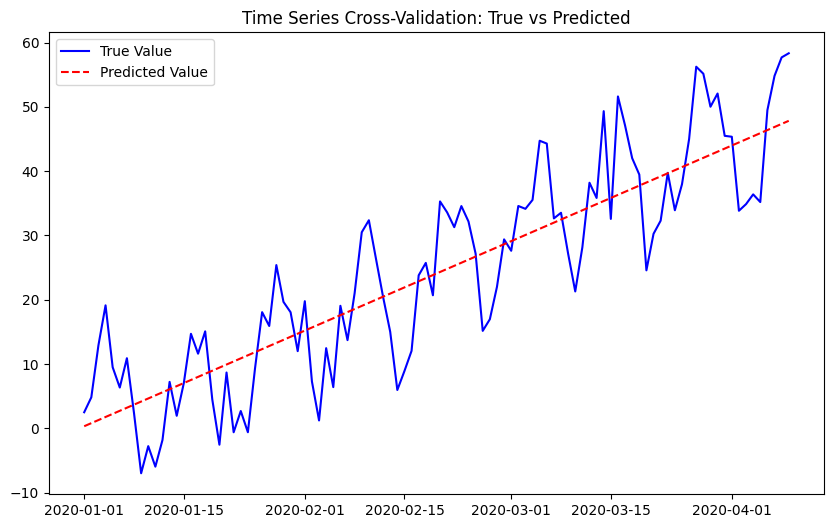

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Generate Synthetic Dataset
np.random.seed(42)  # For reproducibility
time = np.arange(100)
trend = time * 0.5
seasonality = 10 * np.sin(np.pi * time / 6)
noise = np.random.normal(loc=0, scale=5, size=time.size)
data = trend + seasonality + noise
dates = pd.date_range(start='2020-01-01', periods=time.size, freq='D')
ts_data = pd.Series(data, index=dates)

# Step 2: Time Series Cross-Validation Setup
def time_series_cv(X, y, model, n_splits):
    test_scores = []

    tscv = TimeSeriesSplit(n_splits=n_splits)

    for train_idx, test_idx in tscv.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        test_score = mean_squared_error(y_test, y_pred)
        test_scores.append(test_score)

    return test_scores

# Preparing data for modeling
X = time.reshape(-1, 1)
y = data

# Step 3: Model Training
model = LinearRegression()

# Import TimeSeriesSplit
from sklearn.model_selection import TimeSeriesSplit
n_splits = 5
scores = time_series_cv(X, y, model, n_splits=n_splits)

# Step 4: Evaluate Model Performance
print(f'MSE Scores for each split: {scores}')
print(f'Average MSE: {np.mean(scores)}')

# Step 5: Visualize the Results
plt.figure(figsize=(10, 6))
plt.plot(dates, data, label='True Value', color='blue')
plt.plot(dates, model.predict(X), label='Predicted Value', color='red', linestyle='--')
plt.title('Time Series Cross-Validation: True vs Predicted')
plt.legend()
plt.show()